In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [202]:
df = pd.read_csv("tkt_time_clean.csv")

In [203]:
df = df[df.ISSUE_YR >= 2020]

In [204]:
df = df.drop(["ISSUE_YR", "ISSUE_WEEK"], axis=1)

In [205]:
df['time'] = df['time'].apply(lambda x:x-156)

In [206]:
df.index = range(0,122)

In [207]:
oil = pd.read_csv("Oil_Price.csv")

In [208]:
oil = oil[(oil.ISSUE_YEAR>=2020) & (oil.ISSUE_WEEK<=52)]

In [209]:
oil["time"] = range(1,261)

In [210]:
oil = oil[["time", "Oil Price"]]

In [211]:
oil.index = range(0,260)

In [212]:
train = oil[oil.time<=122]
test = oil[oil.time>122]

In [213]:
train = pd.concat([train, df[["covid_policy", "TOTAL_TICKETS"]]], axis=1)

In [214]:
from sklearn.linear_model import LinearRegression
from math import log, exp

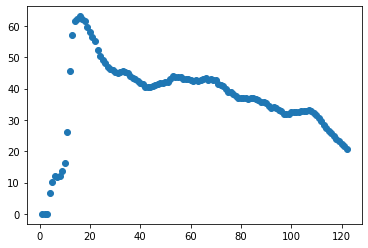

In [215]:
plt.scatter(train.time, train.covid_policy)

In [216]:
train[train.time>=100]

,time,Oil Price,covid_policy,TOTAL_TICKETS
99,100,79.015,32.634724,16874952
100,101,68.945,32.598641,16238822
101,102,73.050,32.507773,15986722
102,103,72.470,32.564770,13870531
103,104,72.770,32.683965,15395992
104,105,79.180,32.692612,17777537
105,106,83.295,32.885656,18402754
106,107,87.545,33.138087,17935034
107,108,88.530,32.805907,18189370
108,109,91.185,32.334531,19385540


In [217]:
lm = LinearRegression()

In [218]:
lm.fit(train[train.time>=110].time.values.reshape(-1, 1), \
       train[train.time>=110].covid_policy.apply(lambda x:log(x)).values.reshape(-1, 1))

LinearRegression()

In [219]:
pred = lm.predict(test.time.values.reshape(-1, 1))

In [220]:
pred

array([[ 2.99872375],
       [ 2.96380932],
       [ 2.9288949 ],
       [ 2.89398048],
       [ 2.85906605],
       [ 2.82415163],
       [ 2.7892372 ],
       [ 2.75432278],
       [ 2.71940835],
       [ 2.68449393],
       [ 2.6495795 ],
       [ 2.61466508],
       [ 2.57975065],
       [ 2.54483623],
       [ 2.50992181],
       [ 2.47500738],
       [ 2.44009296],
       [ 2.40517853],
       [ 2.37026411],
       [ 2.33534968],
       [ 2.30043526],
       [ 2.26552083],
       [ 2.23060641],
       [ 2.19569198],
       [ 2.16077756],
       [ 2.12586314],
       [ 2.09094871],
       [ 2.05603429],
       [ 2.02111986],
       [ 1.98620544],
       [ 1.95129101],
       [ 1.91637659],
       [ 1.88146216],
       [ 1.84654774],
       [ 1.81163332],
       [ 1.77671889],
       [ 1.74180447],
       [ 1.70689004],
       [ 1.67197562],
       [ 1.63706119],
       [ 1.60214677],
       [ 1.56723234],
       [ 1.53231792],
       [ 1.49740349],
       [ 1.46248907],
       [ 1

In [221]:
test['covid_policy'] = pred

<ipython-input-221-63d286e6d6d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['covid_policy'] = pred


In [222]:
test['covid_policy'] = test['covid_policy'].apply(lambda x:exp(x))

<ipython-input-222-69add068b1cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['covid_policy'] = test['covid_policy'].apply(lambda x:exp(x))


In [223]:
test.to_csv("all_test.csv", index=False)

In [224]:
train.to_csv("all_train.csv", index=False)